1．csvデータをデータベースに入れる

・10項目×32データ(30データの場合もあり) ×csvファイル10個

・Pythonでcsvファイル開く→データベースに格納

In [8]:
import csv
import sqlite3

#--------------------------------------------
#関数 importdb
#内容 1レコード追加する
#引数 date, item1, item2, item3, item4,
#  item5, item6, item7, item8, item9, item10
#--------------------------------------------
def importdb(date, item1, item2, item3, item4, item5, item6, item7, item8, item9, item10):
    conn = sqlite3.connect("test_data.db") #データベースに接続
    cur = conn.cursor() #カーソル設定
    sql = "insert into test_data(date,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10) values(?,?,?,?,?,?,?,?,?,?,?)" #プレイスホルダーのSQL
    data = (date, item1, item2, item3, item4, item5, item6, item7, item8, item9, item10) #タプルでデータを入れる　?に当てはめるデータ
    cur.execute(sql, data) #SQL文 パラメータクエリ data パラメータクエリに当てはめるデータ
    conn.commit() #データを追加
    conn.close()

#--------------------------------------------
#メイン処理
#--------------------------------------------
#===日付指定===
csv_lst = [str(num).zfill(6)+".csv" for num in range(230201, 230211)] #dbに格納する日付を指定 range(初日,終日+1)
# csv_lst = ["230201.csv","230202.csv","230203.csv","230204.csv","230205.csv","230206.csv","230207.csv","230208.csv","230209.csv","230210.csv",]

#===csvファイルを開く、内容を取得、データベースに格納===
for csvf in csv_lst:
    print("ファイル名=", csvf) #確認用
    with open(csvf, encoding='UTF-8') as f:
        r = csv.reader(f) #csv読み込み
        r_item = next(r) #1行目 item名を取得
        r_spec = next(r) #2行目 Specを含めない
        r_usl = next(r) #3行目 USLを含めない
        r_lsl = next(r) #4行目 LSLを含めない

        date = r_item[0] #日付を取得
        l_spec = r_spec[1:] #SPECを取得
        l_usl = r_usl[1:] #USLを取得
        l_lsl = r_lsl[1:] #LSLを取得

        print("測定日=", date) #確認用
        # print("SPEC=", l_spec);print("USL=", l_usl);print("LSL=", l_lsl) #確認用
        
        num = 0
        for row in r: #データ1件目～から順に取得。32件、30件どちらでも対応可。
            num += 1
            # print("中身=", date,row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9],row[10])  #確認用
                    # 測定日  data1 ~ data10
            importdb(date,row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9],row[10]) #関数importdb 1レコードを追加
    print("総数=", num, "件 完了！");print("--------------") #確認用

ファイル名= 230201.csv
測定日= 230201
総数= 32 件 完了！
--------------
ファイル名= 230202.csv
測定日= 230202
総数= 32 件 完了！
--------------
ファイル名= 230203.csv
測定日= 230203
総数= 32 件 完了！
--------------
ファイル名= 230204.csv
測定日= 230204
総数= 32 件 完了！
--------------
ファイル名= 230205.csv
測定日= 230205
総数= 32 件 完了！
--------------
ファイル名= 230206.csv
測定日= 230206
総数= 32 件 完了！
--------------
ファイル名= 230207.csv
測定日= 230207
総数= 32 件 完了！
--------------
ファイル名= 230208.csv
測定日= 230208
総数= 32 件 完了！
--------------
ファイル名= 230209.csv
測定日= 230209
総数= 32 件 完了！
--------------
ファイル名= 230210.csv
測定日= 230210
総数= 32 件 完了！
--------------


2．データベースからボックスプロットを表示

・Pythonで、db読み込み、項目毎に日別でボックスプロット並べて表示

(傾向を確認できる)

SPEC= ['3', '10', '5', '5', '10', '10', '7', '7', '20', '20']
USL= ['3.01', '10.1', '5.02', '5.02', '10.1', '10.1', '7.05', '7.05', '20.2', '20.2']
LSL= ['2.99', '9.9', '4.98', '4.98', '9.9', '9.9', '6.95', '6.95', '19.8', '19.8']


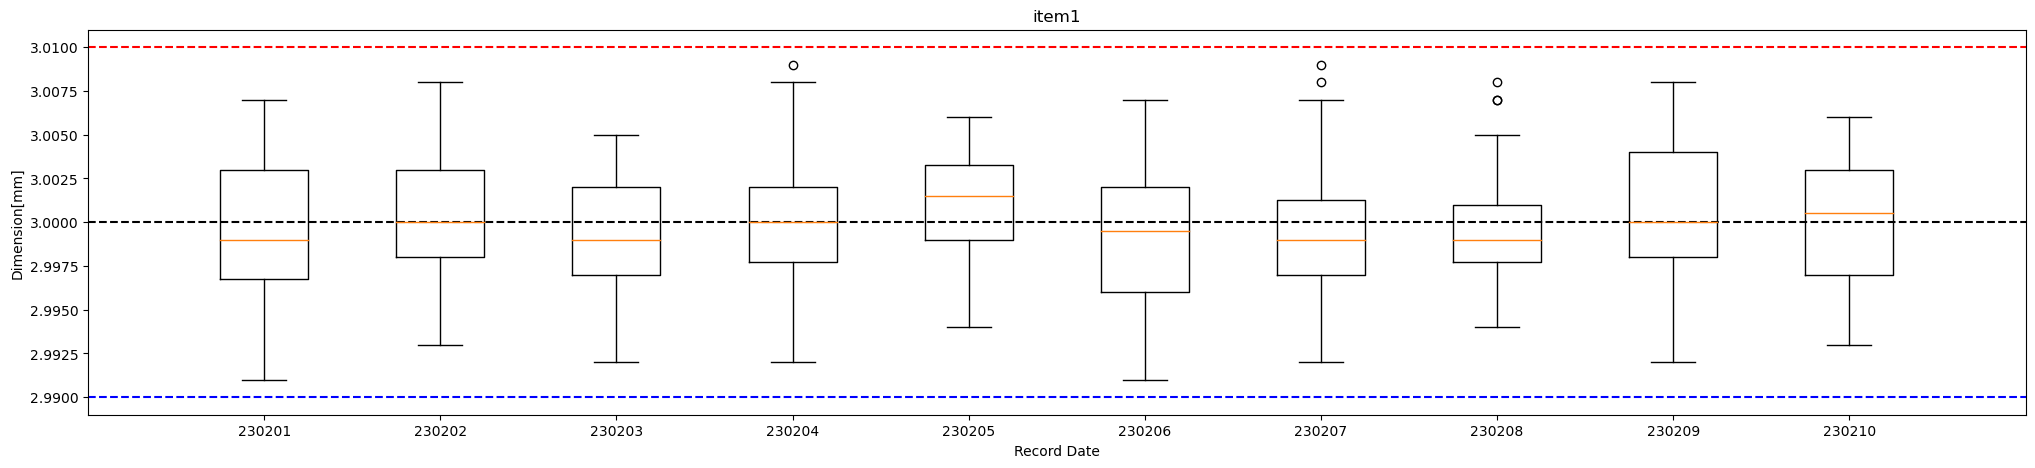

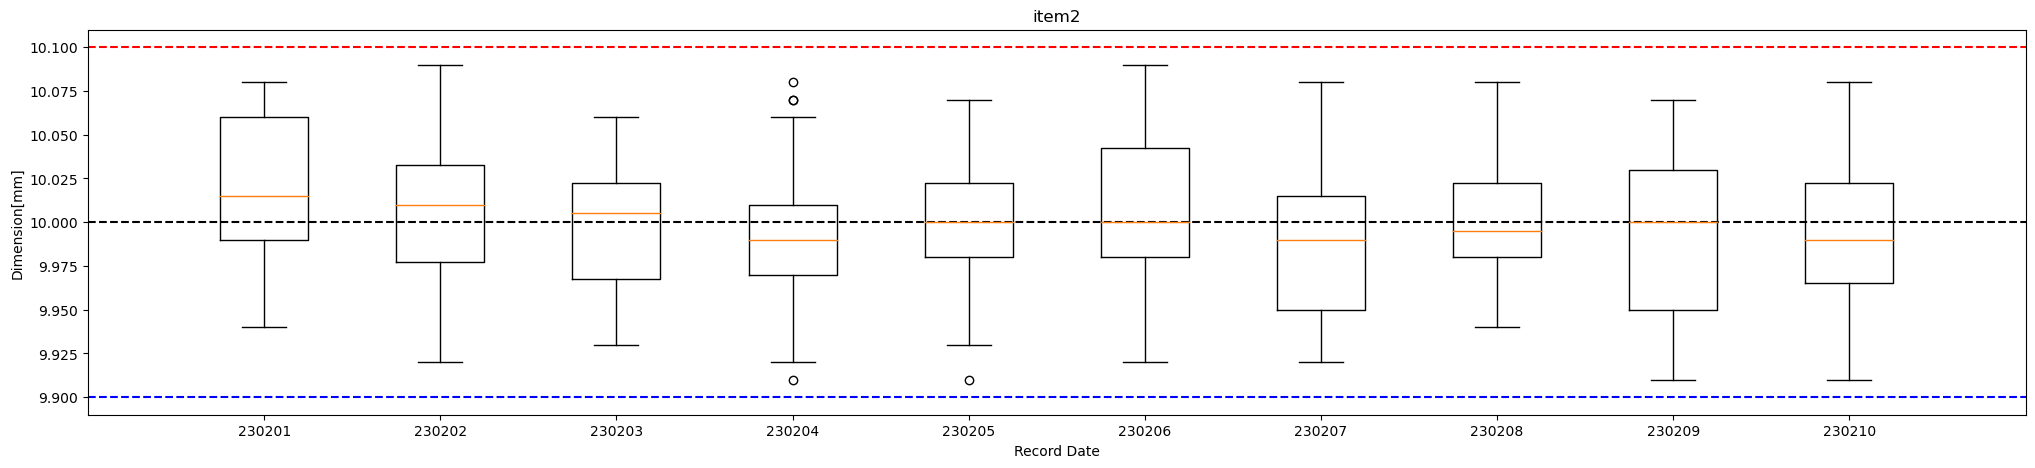

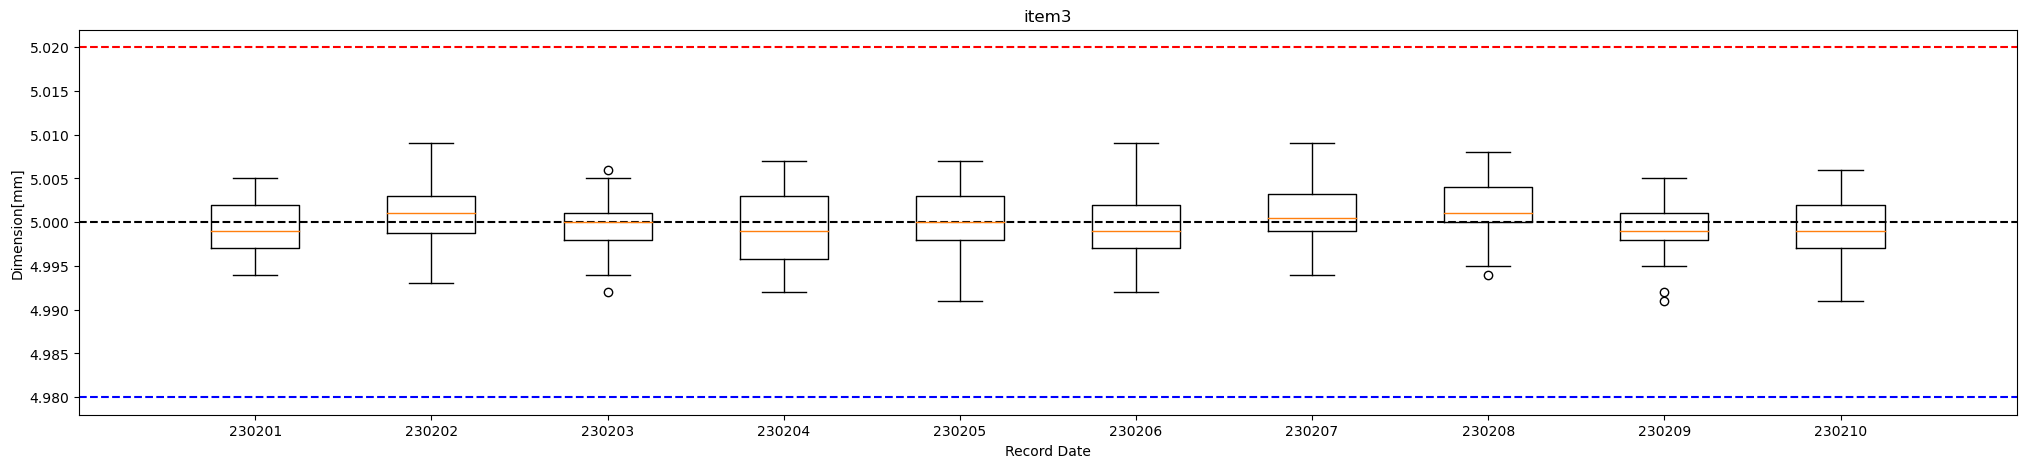

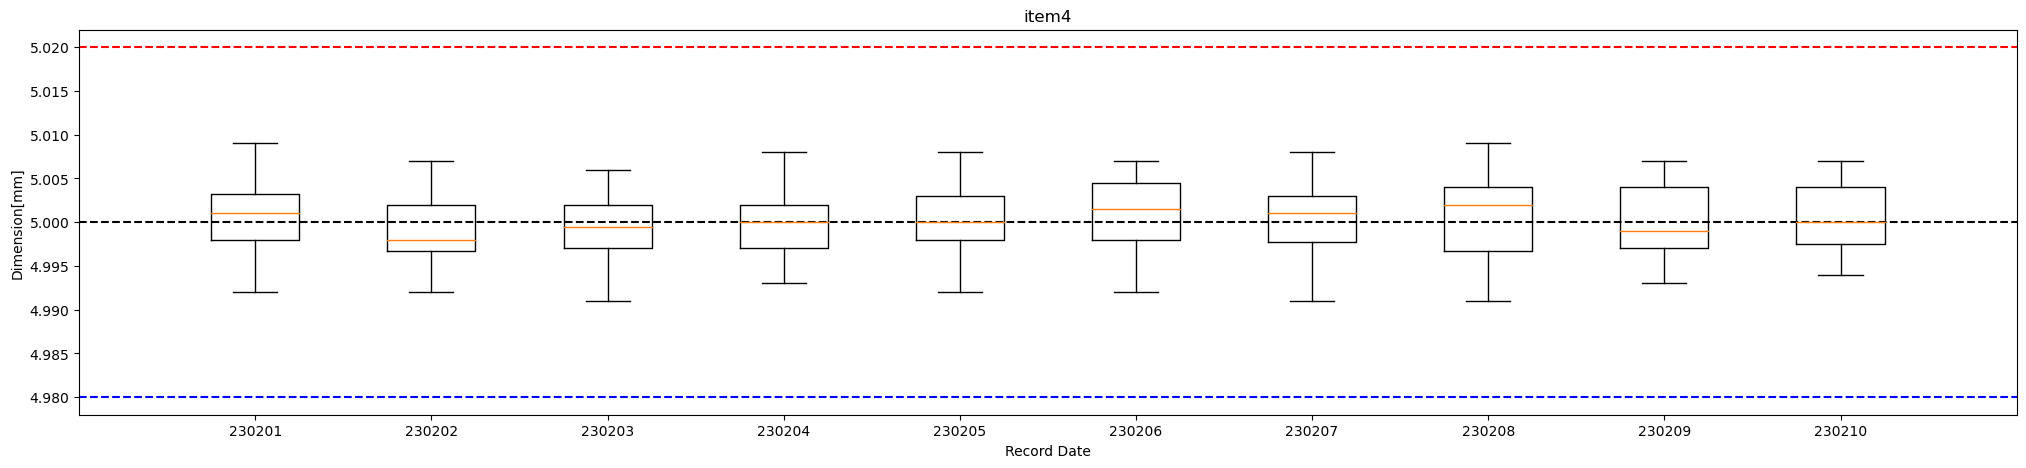

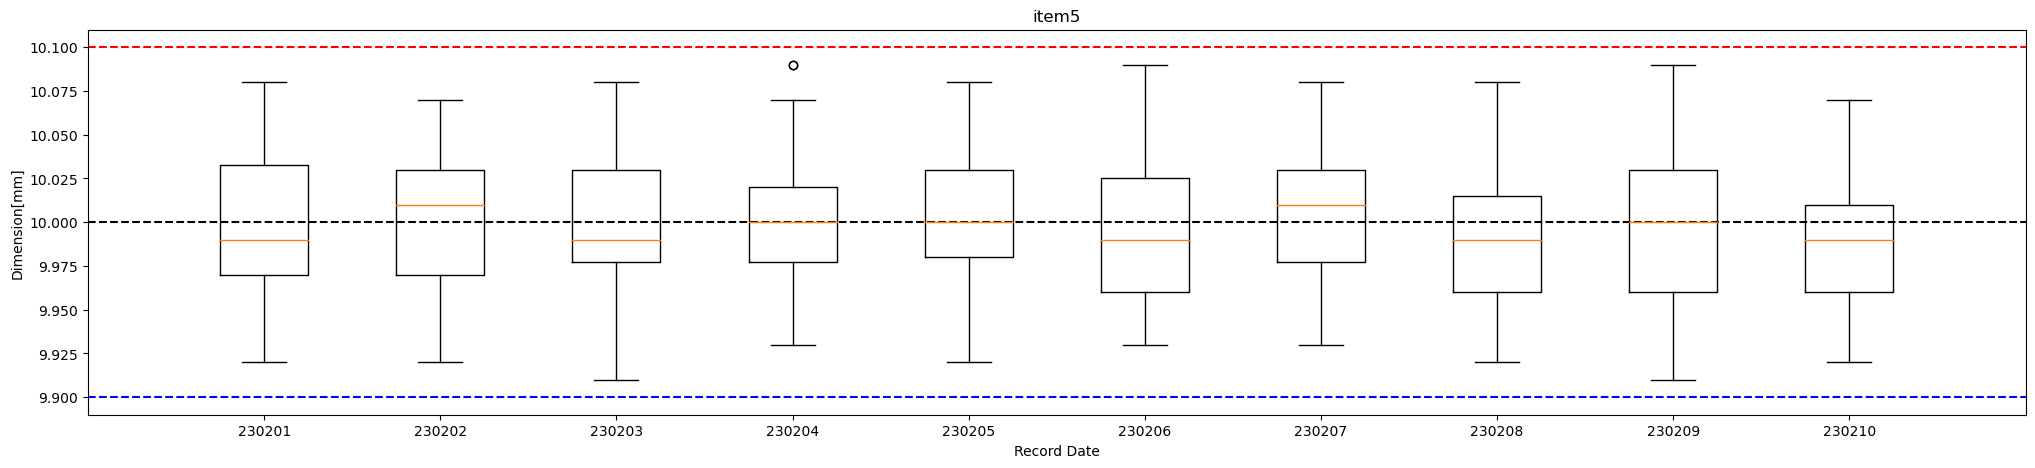

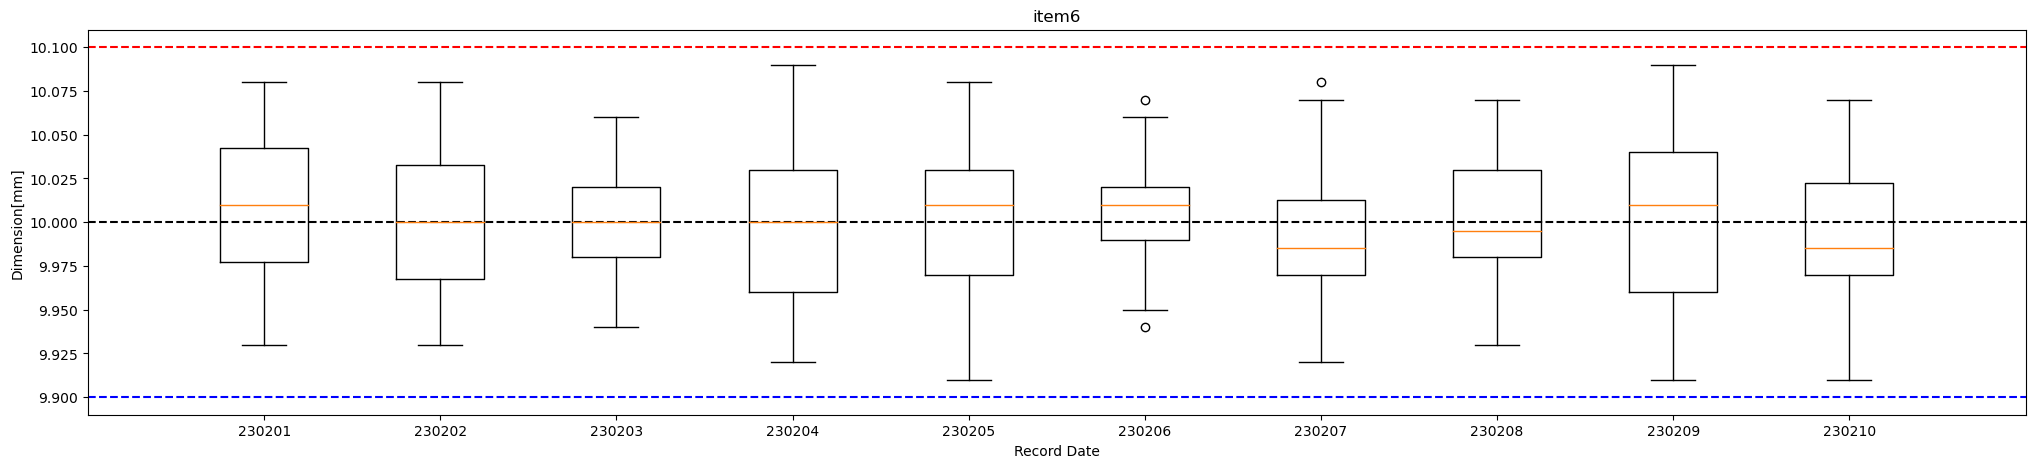

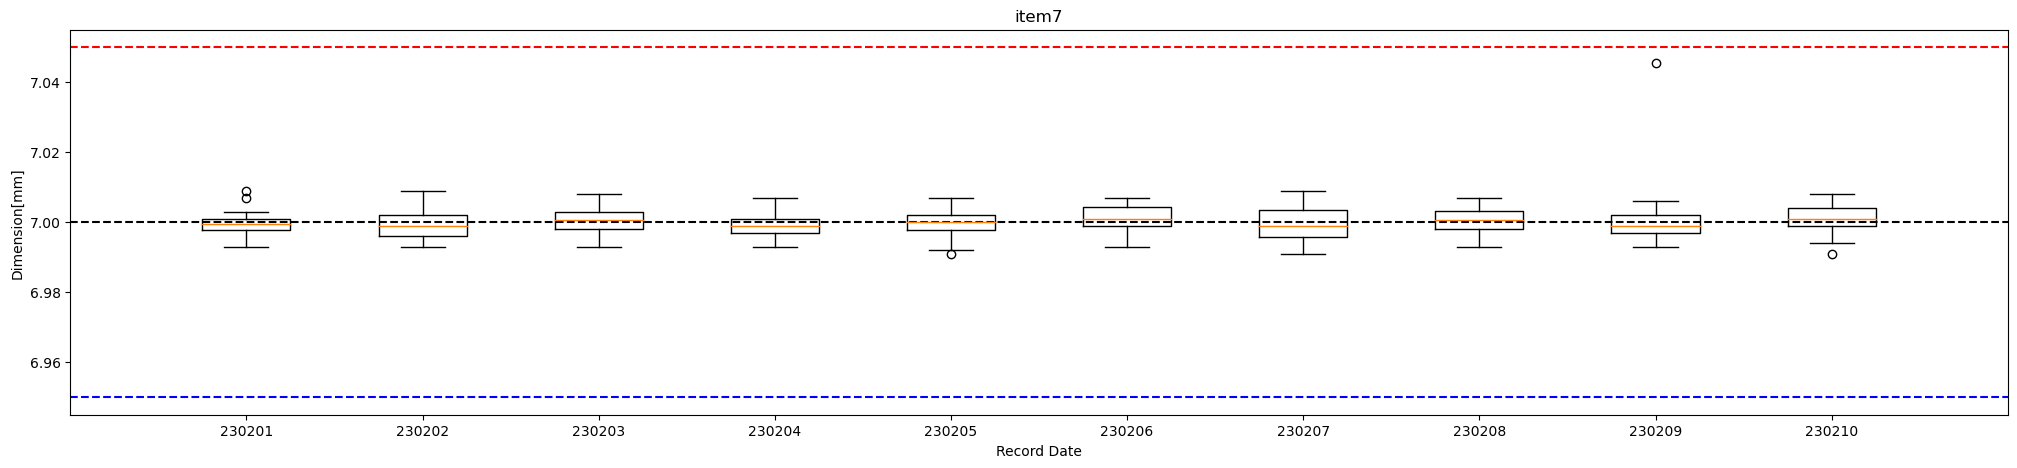

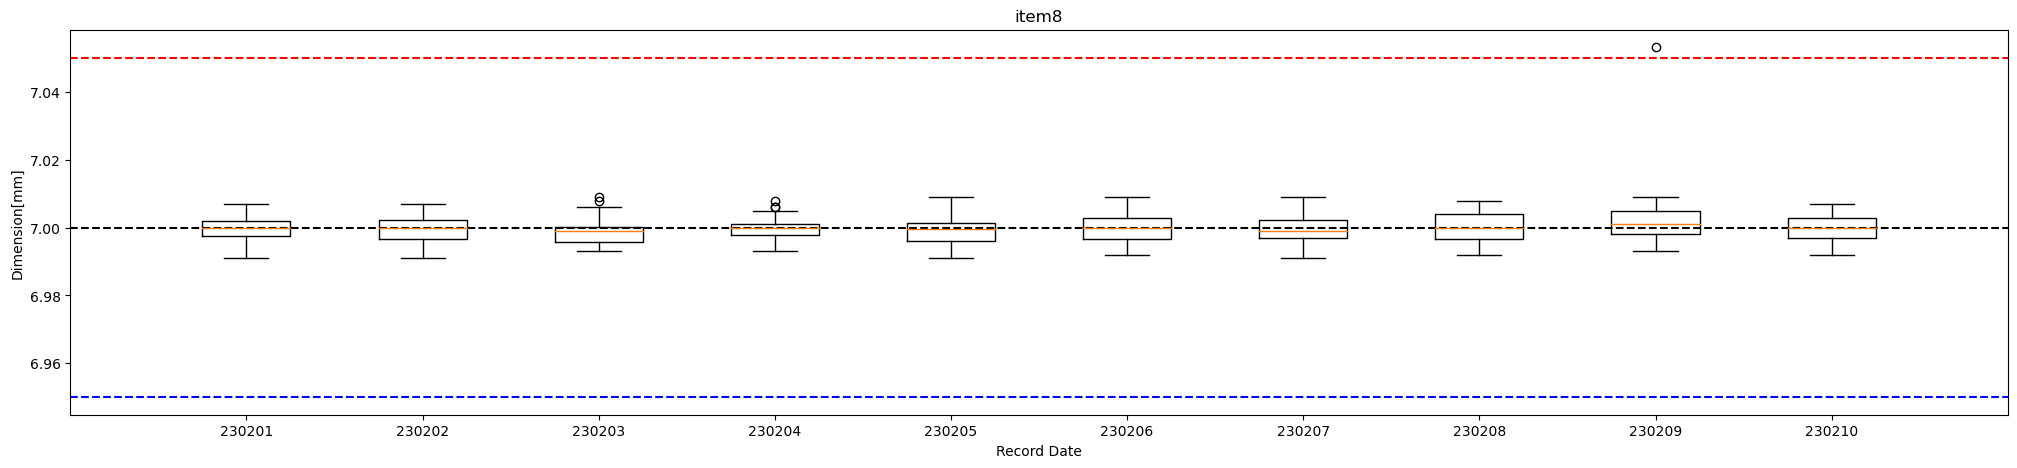

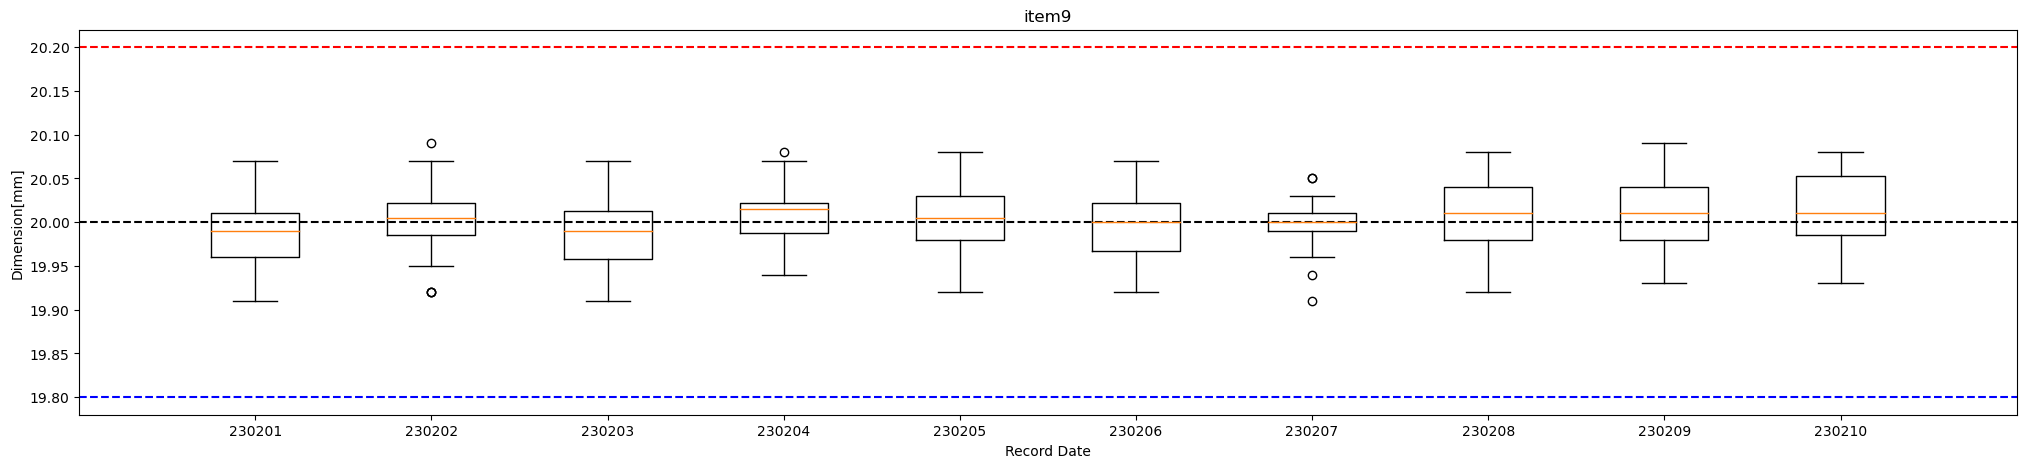

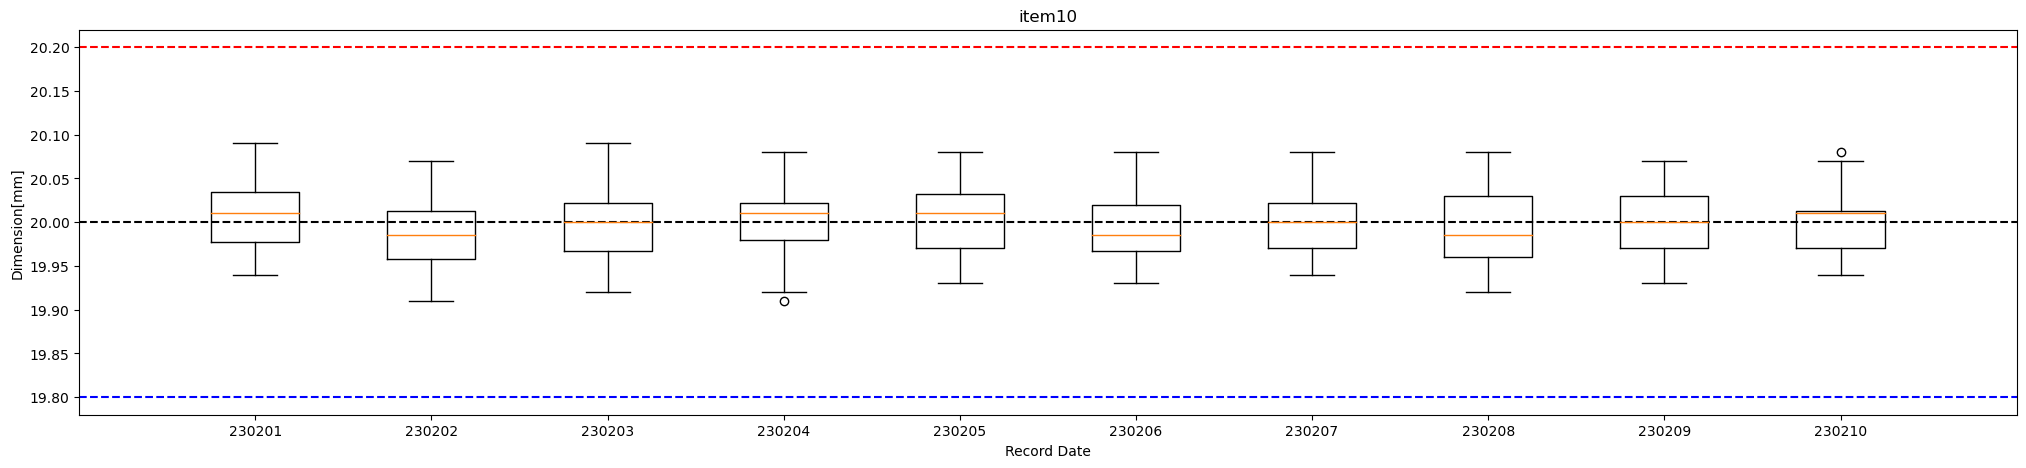

In [3]:
import sqlite3
import numpy as  np
from matplotlib import pyplot as plt
import pandas as pd

#-----------------------------------------------
# 関数名 data_get
# 引数   sql
# 戻り値 uID,r_day,item1,item2,item3,
# item4,item5,item6,item7,item8,item9,item10
#-----------------------------------------------
def data_get(sql):
    global uID,r_day,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10 #global変数にしておく
    uID,r_day,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10 = [], [], [], [], [], [], [], [], [], [], [], [] #空のリストを準備
    conn = sqlite3.connect("test_data.db") #データべースに
    cur = conn.cursor() #カーソル設定
    for row in cur.execute(sql): #SQLを実行 
        uID.append(row[0]) #各項目ごとにリストに格納
        r_day.append(row[1])
        item1.append(row[2])
        item2.append(row[3])
        item3.append(row[4])
        item4.append(row[5])
        item5.append(row[6])
        item6.append(row[7])
        item7.append(row[8])
        item8.append(row[9])
        item9.append(row[10])
        item10.append(row[11])
    conn.close()
    return uID,r_day,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10

#-----------------------------------------------
#メイン処理
#-----------------------------------------------
#===SQL===
sql = "SELECT ID,date,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10 from test_data" #SQL
data_get(sql) #関数data_get DBからデータを取得

#===DataFrameに格納===
data = {"uID": uID,"date": r_day,
        "item1": item1,"item2": item2,"item3": item3,"item4": item4,"item5": item5,
        "item6": item6,"item7": item7,"item8": item8,"item9": item9,"item10": item10}
df = pd.DataFrame(data) #引数()内はリスト型で
# print(df) #確認用

#===初期設定===
plot_index = [] #空のリストを準備
# mu_lst, sig_lst, cp_lst, cpk_ls, plot_index = [], [], [], [] #空のリストを準備
plot_item1,plot_item2,plot_item3,plot_item4,plot_item5,plot_item6,plot_item7,plot_item8,plot_item9,plot_item10 = [], [], [], [], [], [], [], [], [], [] #空のリストを準備
plot_item_l = [plot_item1,plot_item2,plot_item3,plot_item4,plot_item5,plot_item6,plot_item7,plot_item8,plot_item9,plot_item10] #表示する項目を指定
day = 230201 #表示する初日
matome_days = 10 #表示する日数

#===データをまとめる===
for d in range(matome_days): #230201を初日として10日分まとめる
    for i,l in enumerate(plot_item_l):
        day_data = [item for item in df["item"+str(i+1)].loc[df["date"] == day]] #日付とitem番号で抽出
        # print(day_data) #確認用
        l.append(day_data)
        # ===各計算===
        # mu_lst.append(np.mean(day_data)) #今回は使わない
        # sig_lst.append(np.std(day_data)) #今回は使わない
        # print(np.std(day_data)) #今回は使わない
    plot_index.append(day)
    day += 1

#===Y軸の上下限===
print("SPEC=", l_spec);print("USL=", l_usl);print("LSL=", l_lsl) #確認用

#===ボックスプロット表示===
item_l = ["item1","item2","item3","item4","item5","item6","item7","item8","item9","item10"] #表示するitemを指定
for i,l in enumerate(plot_item_l):
    fig = plt.figure(figsize=(25,5)) #グラフのサイズを指定
    ax = fig.add_subplot(1, 1, 1) #縦並びにグラフを配置
    ax.boxplot(l, labels=plot_index) #ボックスプロット
    plt.title(item_l[i]) #タイトル itemリストから
    plt.xlabel("Record Date") #x軸タイトル
    plt.ylabel("Dimension[mm]") #y軸タイトル
    plt.xlim(0, matome_days + 1) #x表示範囲 0～表示する日数
    plt.hlines([float(l_spec[i]), float(l_usl[i]), float(l_lsl[i])], 0, matome_days+1, linestyles="dashed", colors=["black", "red", "blue"]) #上下限の線を引く
    # plt.text( 10, 10, f'平均 {mu}') #今回は使わない
    # plt.text(f'標準偏差 {sig:.2f}') #今回は使わない
plt.show() 